In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [2]:
minhp = 100 # minimum horse power
maxhp = 600 # maximum horse power
lowestpr = 5 # lowest price
highestpr = 50 # highest price

fprice_low = 20 # lowest price family car
fprice_high = 40 # highest price family car
fpower_low = 300 # lowest horse power family car
fpower_high = 500 # highest horse power family car

family_car = [[random.uniform(fprice_low,fprice_high),random.uniform(fpower_low,fpower_high),1] for i in range(100)]


In [3]:
other_car = []
for i in range(100):
    price = random.uniform(lowestpr,highestpr)
    horse_power = random.uniform(minhp,maxhp)
    while price>fprice_low and price<fprice_high and horse_power > fpower_low and horse_power < fpower_high:
        price = random.uniform(lowestpr, highestpr)
        horse_power = random.uniform(minhp,maxhp)
    other_car.append([price,horse_power,0]) 
print(len(other_car))

100


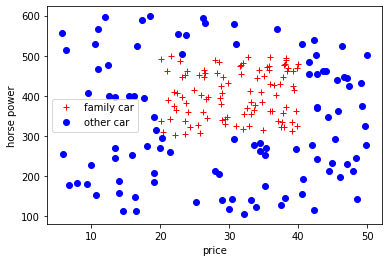

In [4]:
dataset = family_car+other_car
dataset = np.array(dataset)
fig,ax = plt.subplots()
family_car = np.array(family_car)
other_car = np.array(other_car)
ax.plot(family_car[:,0],family_car[:,1],'+',color = 'red',label= 'family car')
ax.plot(other_car[:,0],other_car[:,1],'o',color = 'blue',label= 'other car')
ax.set_xlabel('price')
ax.set_ylabel('horse power')
ax.legend()


[138 106 136 103  44  20 112 188  79  99  57  49   2  56 165 177 183  37
 115  95 186 149 146 157  47 130 199 153 124   0  60 144  61  10  18 116
  26  54 189 141  25 174  38 133  48  23 166  24 195  43  53   9 142   4
 148  41  64 109 158  93  86 161 179 102  90 139  33 191 192 120 194  76
 180  96 128 160  16  27 154 125 101 127  32  77 123 121 122 131 105 132
 143   3   5  78  63 137  35  71 140  81  68 104 184  55  58  74  39  34
 155  97   8 114 162  31 182  59  12  40 176  66]


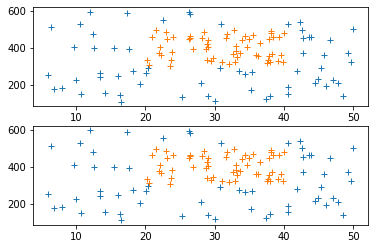

In [5]:
n=np.array(range(200))
np.random.shuffle(n)
mask_training=n[:120]
training_data=dataset[mask_training,:]
print(mask_training)
mask_test=n[120:]
test_data=dataset[mask_test,:]

fig, ax=plt.subplots(2)
for x,y,z in training_data:
    ax[0].plot(x,y,'+',color=f'C{int(z)}',label='training data')

for x,y,z in training_data:
    ax[1].plot(x,y,'+',color=f'C{int(z)}',label='test data')

In [6]:
def error_function(data,p1,p2,e1,e2):
    error=0
    for i in data:
        price=i[0]
        horsepower=i[1]
        label=i[2]
        if (price>p1 and price >p2 and horsepower>e1 and horsepower>e2):
            if label!=1:
                error+=1
        else:
            if label!=0:
                error+=1
    return error

In [7]:
e=error_function(training_data,30,40,300,500)
e

63

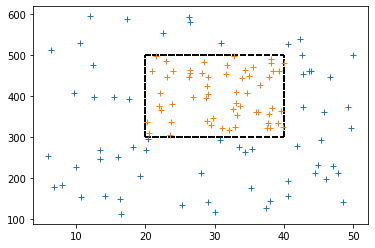

In [8]:
fig, ax=plt.subplots()
for x,y,z in training_data:
    ax.plot(x,y,'+',color=f'C{int(z)}',label='training data')
    ax.hlines(300,20,40,linestyles='dashed')
    ax.hlines(500,20,40,linestyles='dashed')
    ax.vlines(20,300,500,linestyles='dashed')
    ax.vlines(40,300,500,linestyles='dashed')

In [9]:
errors=[]
values=[]
p1_range=list(range(15,25,1))
p2_range=list(range(35,45,1))
e1_range=list(range(280,320,10))
e2_range=list(range(480,520,10))

for p1 in p1_range:
    for p2 in p2_range:
        for e1 in e1_range:
            for e2 in e2_range:
                error=error_function(training_data,p1,p2,e1,e2)
                errors.append(error)
                values.append([p1,p2,e1,e2])
                

In [10]:
def locate_min(a):
    smallest=min(a)
    return smallest, [index for index, element in enumerate(a) if smallest== element]


In [11]:
minimum_value,index=locate_min(errors)
print(minimum_value)
print(index)

59
[131, 135, 139, 143, 147, 151, 155, 159, 291, 295, 299, 303, 307, 311, 315, 319, 451, 455, 459, 463, 467, 471, 475, 479, 611, 615, 619, 623, 627, 631, 635, 639, 771, 775, 779, 783, 787, 791, 795, 799, 931, 935, 939, 943, 947, 951, 955, 959, 1091, 1095, 1099, 1103, 1107, 1111, 1115, 1119, 1251, 1255, 1259, 1263, 1267, 1271, 1275, 1279, 1411, 1415, 1419, 1423, 1427, 1431, 1435, 1439, 1571, 1575, 1579, 1583, 1587, 1591, 1595, 1599]


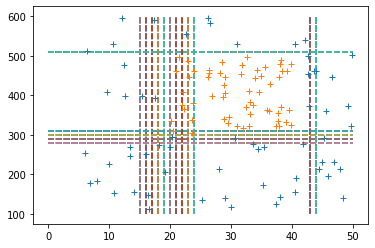

In [12]:
fig, ax=plt.subplots()
for x,y,z in training_data:
    ax.plot(x,y,'+',color=f'C{int(z)}',label='training data')
for i,ix in enumerate(index):
    c=f'C{i}'
    p1,p2,e1,e2=values[ix]
    ax.hlines(e1,0,50,linestyles='dashed',color=c)
    ax.hlines(e2,0,50,linestyles='dashed',color=c)
    ax.vlines(p1,100,600,linestyles='dashed',color=c)
    ax.vlines(p2,100,600,linestyles='dashed',color=c)

In [13]:
for i,ix in enumerate(index):
    p1,p2,e1,e2=values[ix]
    print(error_function(test_data,p1,p2,e1,e2))

42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
